<a href="https://colab.research.google.com/github/abhayak759/AI-ML-Projects/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import  datasets, layers, models
import matplotlib.pyplot as plt


In [12]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train=y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
classes[9]

'truck'

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

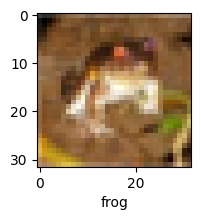

In [25]:
plot_sample(X_train, y_train, 0)

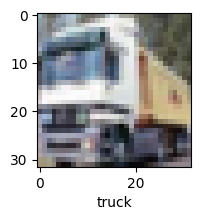

In [26]:
plot_sample(X_train, y_train, 1)

In [28]:
X_train= X_train/255 # normalizing
X_test=X_test/255

when value is in categorical form use categorical_cross entropy else if it is given a numeric valu such as y=8 use sparse_categorical_crossentropy

In [29]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8122 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6227 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5431 - accuracy: 0.4546
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4806 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4329 - accuracy: 0.4936


In [30]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5191 - accuracy: 0.4559


[1.5190601348876953, 0.45590001344680786]

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.59      0.50      1000
           1       0.78      0.33      0.46      1000
           2       0.36      0.28      0.32      1000
           3       0.33      0.43      0.37      1000
           4       0.34      0.56      0.42      1000
           5       0.42      0.26      0.32      1000
           6       0.56      0.47      0.51      1000
           7       0.65      0.42      0.51      1000
           8       0.46      0.76      0.57      1000
           9       0.62      0.46      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



# **Using CNN**

In [32]:
cnn= models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4744 - accuracy: 0.4716
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1208 - accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9972 - accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9100 - accuracy: 0.6836
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8446 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7933 - accuracy: 0.7247
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7407 - accuracy: 0.7420
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7011 - accuracy: 0.7579
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6648 - accuracy: 0.7706
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.63

In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9113 - accuracy: 0.6994


[0.9113147258758545, 0.699400007724762]

In [36]:
y_test[:5]   # it is 2d array convert it into 1 d

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [38]:
y_test=y_test.reshape(-1, ) # converted to 1 d array
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

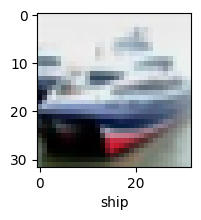

In [39]:
plot_sample(X_test, y_test, 1)

In [41]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[3.0759224e-04, 5.2489061e-03, 7.6419435e-04, 5.3742057e-01,
        1.1228366e-04, 4.4626021e-01, 4.5886352e-03, 2.3534028e-04,
        4.5555406e-03, 5.0678028e-04],
       [1.8312654e-02, 7.7246144e-02, 5.9484737e-04, 5.4657758e-06,
        8.3873765e-06, 5.1617792e-07, 5.2744599e-07, 2.0075649e-05,
        9.0127325e-01, 2.5382007e-03],
       [1.7789582e-02, 2.3994966e-01, 1.7179271e-03, 2.8419940e-02,
        7.5623690e-04, 1.0721972e-02, 5.4402133e-03, 4.9811281e-04,
        6.8869263e-01, 6.0136900e-03],
       [9.3658942e-01, 1.8870674e-02, 7.2466214e-03, 1.6300219e-04,
        7.7458196e-03, 6.6517155e-06, 1.4061802e-04, 2.7904265e-05,
        2.9185232e-02, 2.3977314e-05],
       [5.7642086e-07, 6.3427888e-07, 9.8845235e-04, 6.8460628e-02,
        3.0173535e-02, 3.9095171e-03, 8.9644945e-01, 1.1705637e-06,
        1.5693680e-05, 3.0716831e-07]], dtype=float32)

In [42]:
np.argmax([5, 12, 1, 2]) # it would provide the index of the largest element

1

In [43]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

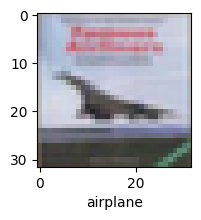

In [45]:
plot_sample(X_test, y_test, 3)

In [46]:
classes[y_classes[3]]

'airplane'

In [47]:
print("Classification Report: \n", classification_report(y_test, y_classes) )

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.79      0.85      0.82      1000
           2       0.66      0.52      0.58      1000
           3       0.48      0.58      0.53      1000
           4       0.63      0.63      0.63      1000
           5       0.59      0.60      0.59      1000
           6       0.69      0.84      0.76      1000
           7       0.81      0.69      0.75      1000
           8       0.84      0.80      0.82      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

